# Data Cleaning and Manipulation

In [1]:
import pandas as pd

# Importing and reading the CSV file into a DataFrame

file_path = '/Users/vimanshusinghmalik/Documents/My_Files/Work/JN_Files/CognifyzTechDataset.csv'
df = pd.read_csv(file_path)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9557 non-null   object 
 1   Restaurant Name       9557 non-null   object 
 2   Country Code          9557 non-null   object 
 3   City                  9557 non-null   object 
 4   Address               9557 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   object 
 8   Latitude              9551 non-null   object 
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   object 
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [2]:
# Removing the duplicate rows from the data
df = df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9557 non-null   object 
 1   Restaurant Name       9557 non-null   object 
 2   Country Code          9557 non-null   object 
 3   City                  9557 non-null   object 
 4   Address               9557 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   object 
 8   Latitude              9551 non-null   object 
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   object 
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
# Step 2: Handling the missing values in the data

df = df.dropna(subset=['Cuisines'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9556
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   object 
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   object 
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   object 
 8   Latitude              9542 non-null   object 
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   object 
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [4]:
# Leaving the values that have null value in the Votes column

df = df.dropna(subset=['Votes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9536 entries, 0 to 9556
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9536 non-null   object 
 1   Restaurant Name       9536 non-null   object 
 2   Country Code          9536 non-null   object 
 3   City                  9536 non-null   object 
 4   Address               9536 non-null   object 
 5   Locality              9536 non-null   object 
 6   Locality Verbose      9536 non-null   object 
 7   Longitude             9536 non-null   object 
 8   Latitude              9536 non-null   object 
 9   Cuisines              9536 non-null   object 
 10  Average Cost for two  9536 non-null   object 
 11  Currency              9536 non-null   object 
 12  Has Table booking     9536 non-null   object 
 13  Has Online delivery   9536 non-null   object 
 14  Is delivering now     9536 non-null   object 
 15  Switch to order menu  9536

In [5]:
# Ensure 'Average Cost for two' column is numeric
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')

# The conversion rates to INR from the given currencies are as follows
exchange_rates = {
    'Botswana Pula(P)': 6.00,          
    'Brazilian Real(R$)': 16.50, 
    'Dollar($)': 82.50,          
    'Emirati Diram(AED)': 22.50,      
    'Indonesian Rupiah(IDR)': 0.0055, 
    'NewZealand($)': 52.00,    
    'Pounds(��)': 101.00,        
    'Qatari Rial(QR)': 22.65,  
    'Rand(R)': 4.60,          
    'Sri Lankan Rupee(LKR)': 0.25,       
    'Turkish Lira(TL)': 3.10,
    'Indian Rupees(Rs.)' : 1
}

# Function to convert currency to INR
def convert_to_inr(amount, currency):
    return amount * exchange_rates[currency]

df['Average_Cost_for_two_INR'] = df.apply(lambda row: convert_to_inr(row['Average Cost for two'], row['Currency']), axis=1)

print(df[['Average_Cost_for_two_INR', 'Restaurant ID']])

      Average_Cost_for_two_INR Restaurant ID
0                       6600.0       6317637
1                       7200.0       6304287
2                      24000.0       6300002
3                       9000.0       6318506
4                       9000.0       6314302
...                        ...           ...
9552                     248.0       5915730
9553                     325.5       5908749
9554                     527.0       5915807
9555                     372.0       5916112
9556                     170.5       5927402

[9536 rows x 2 columns]


# LEVEL 1

# Task 1: Top Cuisines

1) Determine the top three most common cuisines in the dataset.
2) Calculate the percentage of restaurants that serve each of the top cuisines.

In [6]:
# Getting the top three common cuisines

top_cuisines = df['Cuisines'].value_counts().head(3)

print(top_cuisines)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


In [7]:
# Calculate the percentage of restaurants that serve each of the top three cuisines

total_restaurants = len(df)
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100

print(top_cuisines_percentage)


Cuisines
North Indian             9.815436
North Indian, Chinese    5.358641
Chinese                  3.712248
Name: count, dtype: float64


In [8]:
# Adding the pecentage sign to the top three 

top_cuisines_percentage = top_cuisines_percentage.map(lambda x: f"{x:.2f}%")

print(top_cuisines_percentage)

Cuisines
North Indian             9.82%
North Indian, Chinese    5.36%
Chinese                  3.71%
Name: count, dtype: object


# Task 2: City Analysis

1) Identify the city with the highest number of restaurants in the dataset.

2) Calculate the average rating for restaurants in each city.

3) Determine the city with the highest average rating.

In [9]:
# Identifying the city with the highest number of restaurants and the count

top_city = df['City'].value_counts().idxmax()
num_restaurants = df['City'].value_counts().max()

print(f"The city with the highest number of restaurants is {top_city} with {num_restaurants} restaurants.")

The city with the highest number of restaurants is New Delhi with 5472 restaurants.


In [10]:
# Calculating the average rating for the restaurants in each city

df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors= "coerce")
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean()

print(average_rating_per_city)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64


In [11]:
# Determining the city with the highest average rating

city_highest_avg_rating = average_rating_per_city.idxmax()
highest_avg_rating = average_rating_per_city.max()

print(f"The city with the highest average aggregate rating is: {city_highest_avg_rating} with an average rating of {highest_avg_rating}")


The city with the highest average aggregate rating is: Inner City with an average rating of 4.9


# Task 3: Price Range Distibution

1) Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

2) Calculate the percentage of restaurants in each price range category.

In [12]:
# Importing the matplotlib library 
import matplotlib.pyplot as plt

print(df['Price range'].unique())


['3' '4' '2' '1']


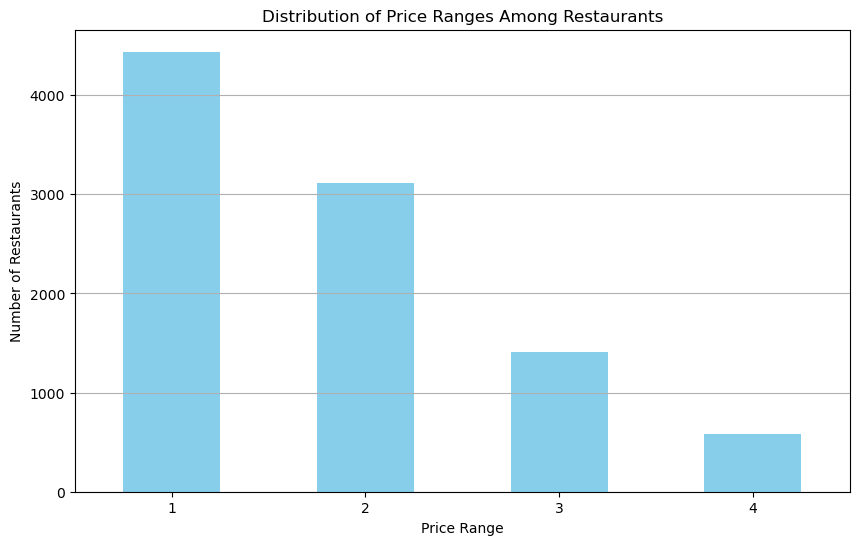

In [13]:

# Plot a bar chart to visualize the distribution of price ranges
price_range_counts = df['Price range'].value_counts()

plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [14]:

# Calculate the count of restaurants in each price range category
price_range_counts = df['Price range'].value_counts()
price_range_percentages = (price_range_counts / len(df)) * 100

print(price_range_percentages)


Price range
1    46.528943
2    32.602768
3    14.733641
4     6.134648
Name: count, dtype: float64


In [15]:
# this code can be used to add a percentage sign to the percentages that are derived above
price_range_percentages = price_range_percentages.map(lambda x: f"{x:.2f}%")
print(price_range_percentages)

Price range
1    46.53%
2    32.60%
3    14.73%
4     6.13%
Name: count, dtype: object


# Task 4: Online Delivery

1) Determine the percentage of restaurants that offer online delivery.

2) Compare the average ratings of restaurants with and without online delivery.

In [16]:
# Ensure the 'Has Online delivery' column exists and check its unique values to understand its format
print(df['Has Online delivery'].unique())

['No' 'Yes']


In [17]:
total_restaurants = len(df)
online_delivery_count = df[df['Has Online delivery'] == 'Yes'].shape[0]
percentage_online_delivery = (online_delivery_count / total_restaurants) * 100

print(f"The percentage of restaurants that offer online delivery is: {percentage_online_delivery:.2f}%")

The percentage of restaurants that offer online delivery is: 25.69%


In [18]:
# Convert 'Aggregate rating' to numeric (if not already numeric) and then printing out the average rating of the restaurants with online and without online delivery options to Establish the comparison
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce")
df = df.dropna(subset=["Aggregate rating", "Has Online delivery"])
average_rating_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print(f"Average rating of restaurants with online delivery: {average_rating_with_delivery:.2f}")
print(f"Average rating of restaurants without online delivery: {average_rating_without_delivery:.2f}")

Average rating of restaurants with online delivery: 3.25
Average rating of restaurants without online delivery: 2.46


# LEVEL 2

# Task 1: Restaurant Ratings 

1) Analyze the distribution of aggregate ratings and determine the most common rating range.

2) Calculate the average number of votes received by restaurants.

In [19]:
import seaborn as sns
import numpy as np

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


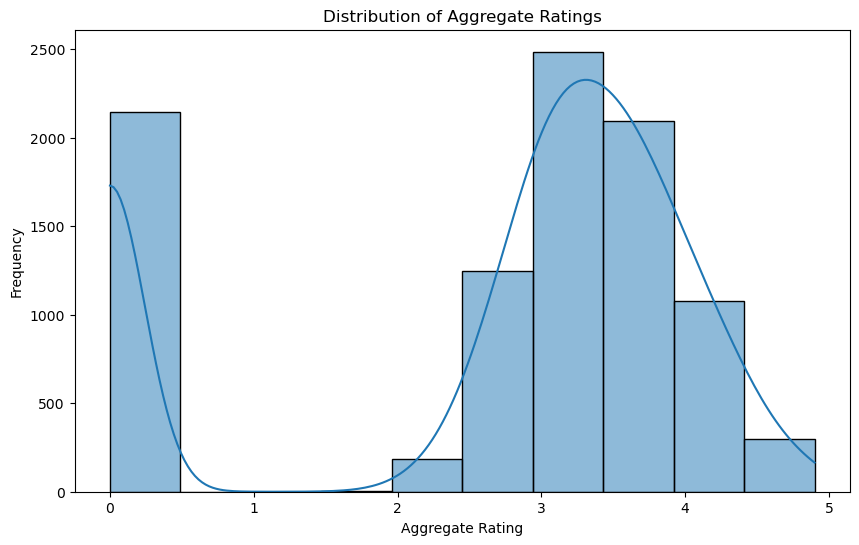

The most common rating range is: (2.94, 3.92]


In [20]:
# Plot the distribution of aggregate ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Determine the most common rating range
rating_counts = df['Aggregate rating'].value_counts(bins=5)
most_common_range = rating_counts.idxmax()

print(f"The most common rating range is: {most_common_range}")

In [21]:
# Calculate the average number of votes
average_votes = df['Votes'].mean()

print(f"The average number of votes received by the restaurants is: {average_votes}")

The average number of votes received by the restaurants is: 156.85046140939596


# Task 2: Cuisine Combination

1) Identify the most common combinations of cuisines in the dataset.

2) Determine if certain cuisine combinations tend to have higher ratings.

In [22]:
# Find the most common combinations of cuisines
most_common_combinations = df['Cuisines'].value_counts()

# Display the most common combinations
print(most_common_combinations)

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64


In [23]:
# Explode the 'Cuisines' column
df_exploded = df.explode('Cuisines')

# Calculate the average rating for each cuisine
average_ratings = df_exploded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

print(average_ratings)


Cuisines
Italian, Deli                    4.9
Hawaiian, Seafood                4.9
American, Sandwich, Tea          4.9
Continental, Indian              4.9
European, Asian, Indian          4.9
                                ... 
Raw Meats, Street Food           0.0
Fast Food, Raw Meats             0.0
Awadhi, Mughlai                  0.0
Fast Food, Mughlai, Armenian     0.0
North Indian, Mithai, Chinese    0.0
Name: Aggregate rating, Length: 1825, dtype: float64


# Task 3: Geographic Analysis

1) Plot the locations of restaurants on a map using longitude and latitude coordinates.

2) Identify any patterns or clusters of restaurants in specific areas.

In [24]:
import geopandas as gpd
from shapely.geometry import Point

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Average_Cost_for_two_INR', 'geometry'],
      dtype='object')


/var/folders/9h/twfwxzn50c97w2hg0hvndqz80000gn/T/ipykernel_88811/768984320.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


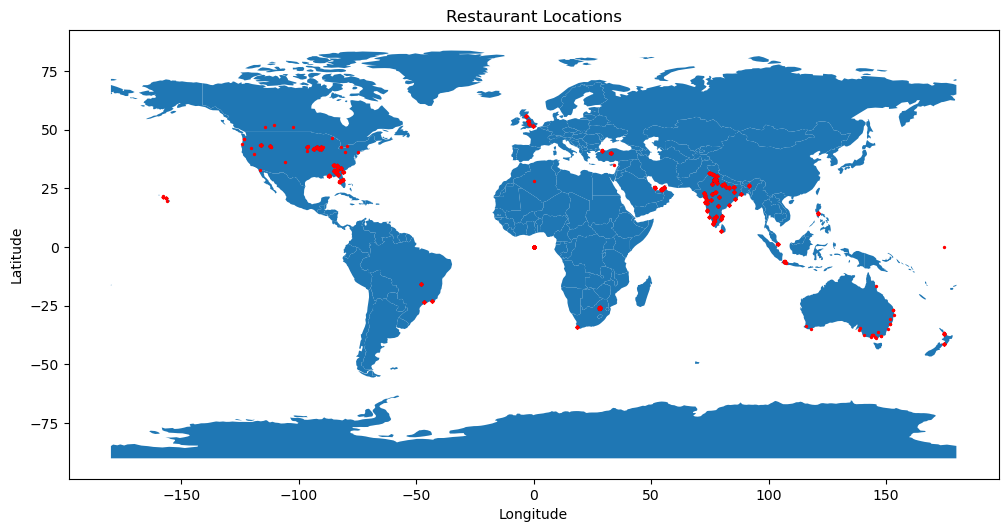

In [25]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

print(gdf.columns)

# Plot the locations on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(12, 10))
gdf.plot(ax=ax, color='red', markersize=2)

plt.title('Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Task 4: Restaurant Chains

1) Identify if there are any restaurant chains present in the dataset.

2) Analyze the ratings and popularity of different restaurant chains.

In [26]:
# Grouping by restaurant_name to check if there are multiple entries for the same restaurant
chain_restaurants = df.groupby('Restaurant Name').filter(lambda x: len(x) > 1)

# Counting the number of unique chains
num_chains = chain_restaurants['Restaurant Name'].nunique()

# Displaying the identified chains
if not chain_restaurants.empty:
    print("The following restaurants are part of a chain:")
    print(f"\nNumber of chains present: {num_chains}")
else:
    print("No restaurant chains identified in the dataset.")

The following restaurants are part of a chain:

Number of chains present: 733


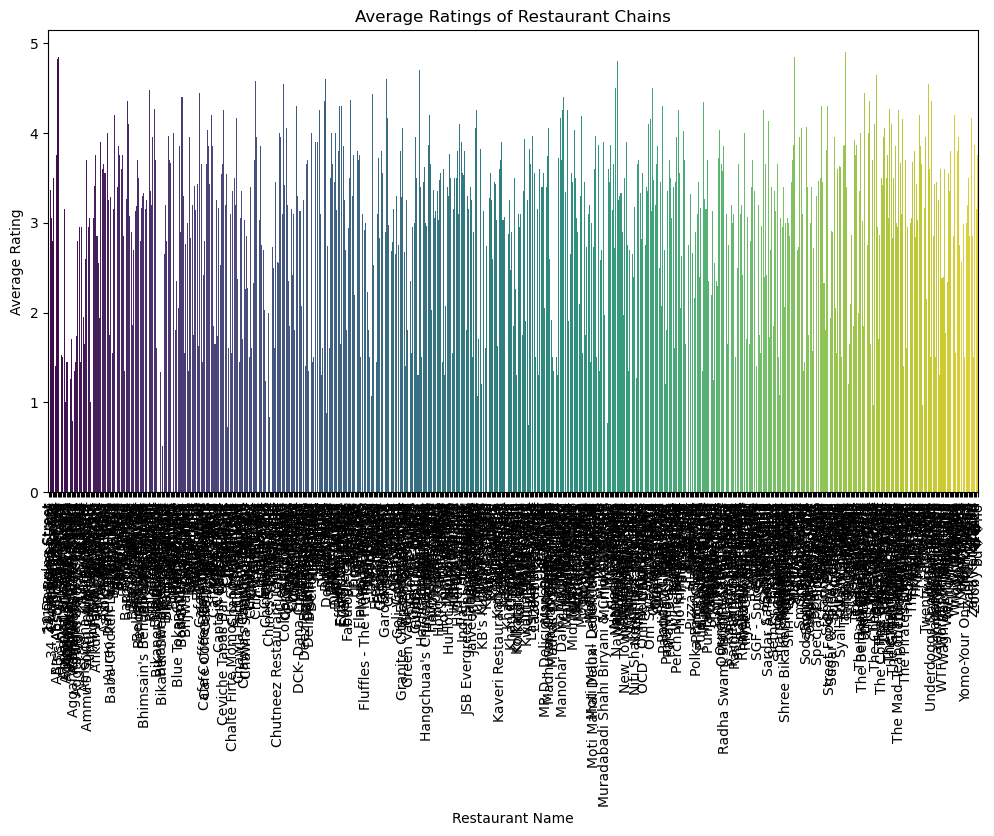

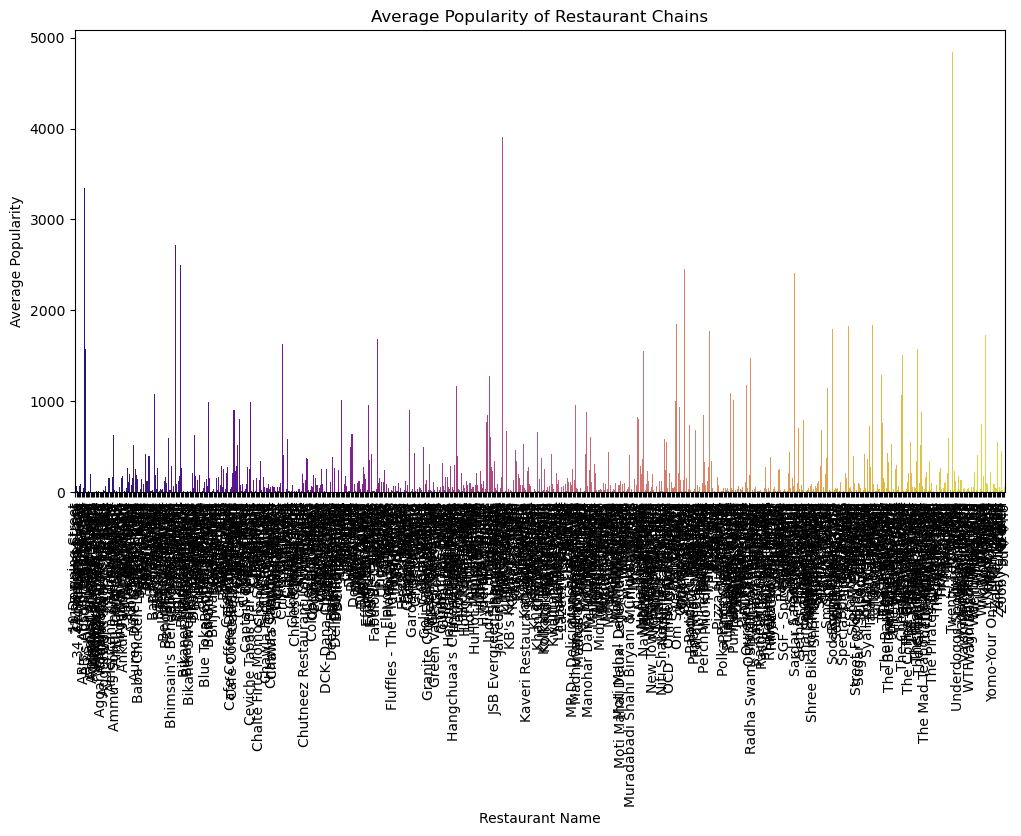

In [27]:
# Grouping by restaurant name to find chains
chain_restaurants = df.groupby('Restaurant Name').filter(lambda x: len(x) > 1)

# Creating visualizations
if not chain_restaurants.empty:
    
    # Grouping chained restaurants by their name and calculating mean ratings and popularity
    chain_grouped = chain_restaurants.groupby('Restaurant Name').agg({
        'Aggregate rating': 'mean',
        'Votes': 'mean'
    }).reset_index()
    
    # Plotting the average ratings of restaurant chains
    plt.figure(figsize=(12, 6))
    sns.barplot(data=chain_grouped, x='Restaurant Name', y='Aggregate rating', palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Average Ratings of Restaurant Chains')
    plt.xlabel('Restaurant Name')
    plt.ylabel('Average Rating')
    plt.show()
    
    # Plotting the average popularity of restaurant chains
    plt.figure(figsize=(12, 6))
    sns.barplot(data=chain_grouped, x='Restaurant Name', y='Votes', palette='plasma')
    plt.xticks(rotation=90)
    plt.title('Average Popularity of Restaurant Chains')
    plt.xlabel('Restaurant Name')
    plt.ylabel('Average Popularity')
    plt.show()
else:
    print("No restaurant chains identified in the dataset.")

So, In the above two graphs we are facing the issue in which the names of the restaurants are being overlapped and the visulaization that we created is not being helpful to us, so for solving this issue I have considered a range of chained restaurants ie. the top 15 restaurants based on the findings in the given data.

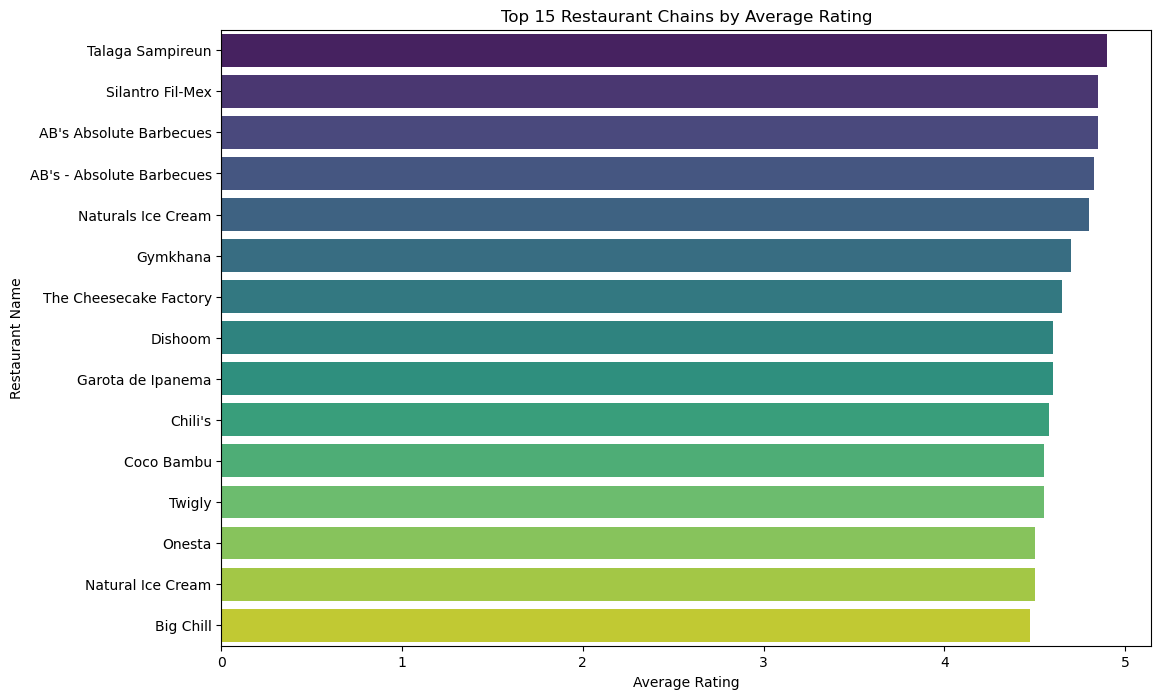

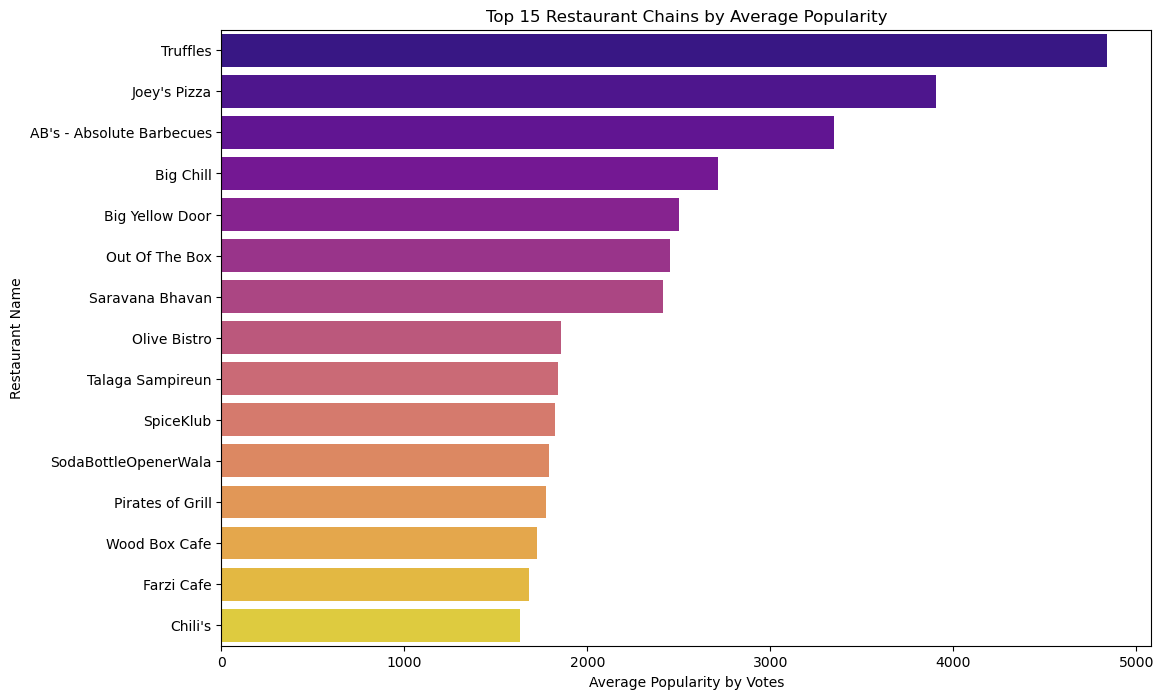

In [28]:
# Grouping by restaurant name to find chains
chain_restaurants = df.groupby('Restaurant Name').filter(lambda x: len(x) > 1)

# Creating visualizations
if not chain_restaurants.empty:
    
    # Grouping chained restaurants by their name and calculating mean ratings and popularity
    chain_grouped = chain_restaurants.groupby('Restaurant Name').agg({
        'Aggregate rating': 'mean',
        'Votes': 'mean'
    }).reset_index()
    
    # Sorting by rating and selecting top 15 restaurants
    top_ratings = chain_grouped.sort_values(by='Aggregate rating', ascending=False).head(15)
    
    # Plotting the average ratings of the top 15 restaurant chains (Horizontal bar plot)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_ratings, y='Restaurant Name', x='Aggregate rating', palette='viridis')
    plt.title('Top 15 Restaurant Chains by Average Rating')
    plt.xlabel('Average Rating')
    plt.ylabel('Restaurant Name')
    plt.show()
    
    # Sorting by popularity and selecting top 15 restaurants
    top_popularity = chain_grouped.sort_values(by='Votes', ascending=False).head(15)
    
    # Plotting the average popularity of the top 15 restaurant chains (Horizontal bar plot)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_popularity, y='Restaurant Name', x='Votes', palette='plasma')
    plt.title('Top 15 Restaurant Chains by Average Popularity')
    plt.xlabel('Average Popularity by Votes')
    plt.ylabel('Restaurant Name')
    plt.show()
else:
    print("No restaurant chains identified in the dataset.")


# LEVEL 3

# Task 1: Restaurant Reviews

1) Analyze the text reviews to identify the most common positive and negative keywords.

2) Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [29]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average_Cost_for_two_INR
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0,6600.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0,7200.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270.0,24000.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365.0,9000.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.58445,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229.0,9000.0


In [30]:
# Count occurrences of each rating
occurrences = df['Rating text'].value_counts()

print(occurrences)

Rating text
Average      3732
Not rated    2146
Good         2094
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64


1) Based on the data, the majority of positive ratings are classified as "Good", while the majority of negative ratings are categorized as "Average".
2) Additionally, it is evident that a significant number of people have not provided ratings.

TASK 1 (PART2) "There is no reviews column in the dataset available."

# Task 2: Votes Analysis

1) Identify the restaurants with the highest and lowest number of votes.

2) Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [31]:
# Find the restaurant with the highest number of votes
max_votes = df.loc[df['Votes'].idxmax()]

# Find the minimum number of votes
min_vote_count = df['Votes'].min()

# Find all restaurants with the lowest number of votes
min_votes = df[df['Votes'] == min_vote_count]

print("Restaurant with the highest number of votes:")
max_votes

print("\nRestaurants with the lowest number of votes:")
min_votes

Restaurant with the highest number of votes:

Restaurants with the lowest number of votes:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average_Cost_for_two_INR
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.67566667,-23.581,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,0.0,907.5
876,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.3000877,28.4262842,Cafe,...,No,No,No,No,1,0.0,White,Not rated,0.0,300.0
881,18465871,Fusion Food Corner,1,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0,0,"North Indian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,0.0,300.0
882,18472646,Punjabi Rasoi,1,Faridabad,"1, Deepak Complex, Eros Charmwood Village, Far...",Charmwood Village,"Charmwood Village, Faridabad",77.292431,28.4923251,North Indian,...,No,No,No,No,1,0.0,White,Not rated,0.0,400.0
889,18471268,Baskin Robbin,1,Faridabad,"Ground Floor, Crown Interiorz Mall, Sector 35,...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.3074479,28.469594,Desserts,...,No,No,No,No,1,0.0,White,Not rated,0.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9050,18486858,6 Packs Momos,1,Noida,"Spice World Mall, Sector 25, Noida","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.3406022,28.586,Chinese,...,No,No,No,No,1,0.0,White,Not rated,0.0,300.0
9104,18431152,Cafe' Wow,1,Noida,"Food Court, 3rd Floor, The Great India Palace ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.3255998,28.5675141,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,0.0,200.0
9105,18439721,Chef's Basket Pop Up Caf��,1,Noida,"Inside Big Bazaar, The Great India Place, Sect...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",0,0,"Italian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,0.0,200.0
9109,18428504,The Hangout-Deli,1,Noida,"320-A, 3rd Floor, The Great India Place Mall, ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.32321292,28.5677509,"Continental, Lebanese, Mexican",...,Yes,No,No,No,3,0.0,White,Not rated,0.0,1000.0


1) The restaurant with highest number of votes is Toit Restaurant located in Bangalore.
2) There Are 1092 Restaurants with "0" votes.

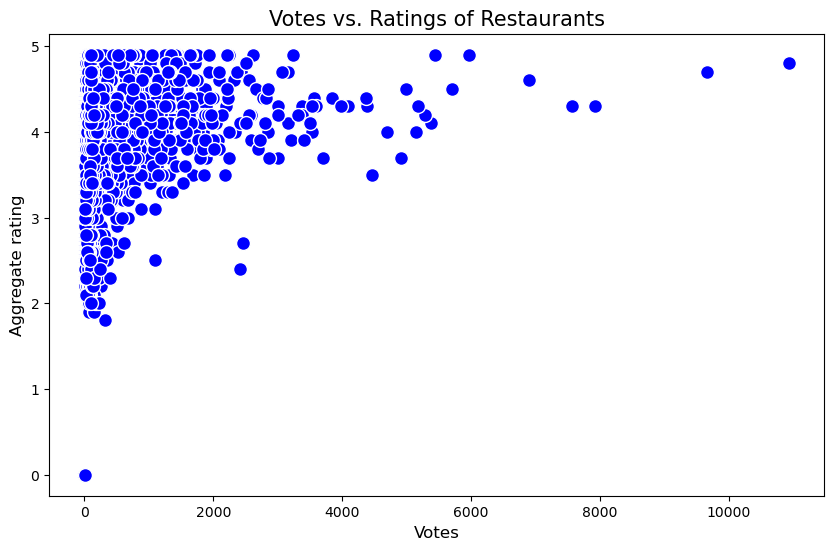

In [32]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, s=100, color='blue', edgecolor='w', linewidth=1)

# Add titles and labels
plt.title('Votes vs. Ratings of Restaurants', fontsize=15)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Aggregate rating', fontsize=12)
plt.show()

TASK 2 (PART 2) 

1) One thing that can be observed is that maximum restaurants have recieved votes below 4000.

2) Based on the available data, we may not say that the number of votes and the aggregate ratings of the restaurants, as there are no discernible trends between these two Columns.

3) However, from the data, we can conclude that restaurants with a higher number of votes tend to have more accurate ratings.

# Task 3: Price Range vs. Online Delivery and Table Booking

1) Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

2) Determine if higher-priced restaurants are more likely to offer these services.

In [39]:
# Counting occurrences of each price range where Online Delivery is "Yes"
counted_data = df[df['Has Online delivery'] == "Yes"]['Price range'].value_counts()

print(counted_data)

Price range
2    1285
1     701
3     411
4      53
Name: count, dtype: int64


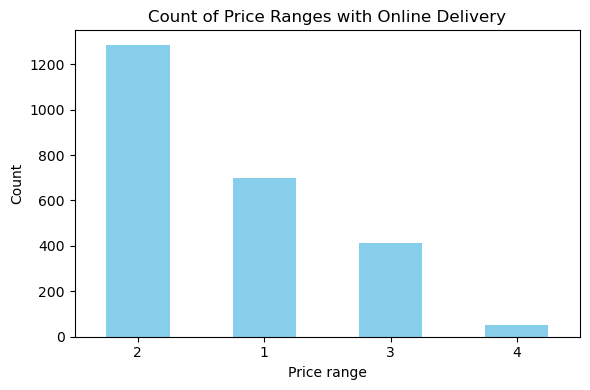

In [40]:
# Plotting the bar graph
plt.figure(figsize=(6, 4))  
counted_data.plot(kind='bar', color='skyblue')

plt.title('Count of Price Ranges with Online Delivery')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.xticks(rotation=0)  

plt.tight_layout()
plt.show()

In [36]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average_Cost_for_two_INR
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0,6600.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0,7200.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270.0,24000.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365.0,9000.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.58445,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229.0,9000.0


In [41]:
# Counting occurrences of each price range where Table Booking is "Yes"
counted_data1 =df[df['Has Table booking'] == "Yes"]["Price range"].value_counts()
print(counted_data1)

Price range
3    644
4    274
2    239
1      1
Name: count, dtype: int64


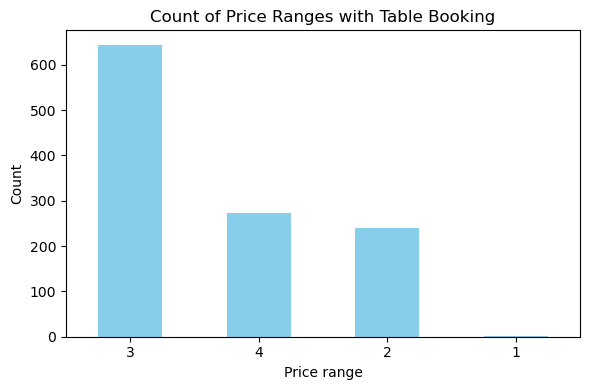

In [42]:
#Plotting the graph
plt.figure(figsize=(6,4)) 
counted_data1.plot(kind='bar', color='skyblue')

plt.title('Count of Price Ranges with Table Booking')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.xticks(rotation=0)  

plt.tight_layout()
plt.show()


TASK 3 (PART 2)

1) ONLINE DELIVERY OBSERVATIONS: The graph indicates that the availability of online delivery is highest among restaurants in the lower-middle price range ie. "2"

2) TABLE BOOKING OBSERVATONS: The graph shows that table booking is most prevalent among higher-middle price range restaurants(3), followed by those in the highest price range(4).

Therefore, it can be concluded that higher-priced restaurants offer table booking but not online delivery.